In [1]:
import os
import sys
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import yfinance as yf

# add utils path
src_path = os.path.abspath('../../')
if src_path not in sys.path:
    sys.path.append(src_path)

# import custom functions
from src.backtest import BacktestTrader
from src.strategies import EWMAC
from src.utils import get_risk_free_rate

In [2]:
START_DATE = '2022-06-01'
END_DATE = '2023-05-31'
TICKER = 'SPY'

SHORT_WINDOW = 5
LONG_WINDOW = 20

prices = yf.download(TICKER, start=START_DATE, end=END_DATE)['Adj Close']

[*********************100%%**********************]  1 of 1 completed


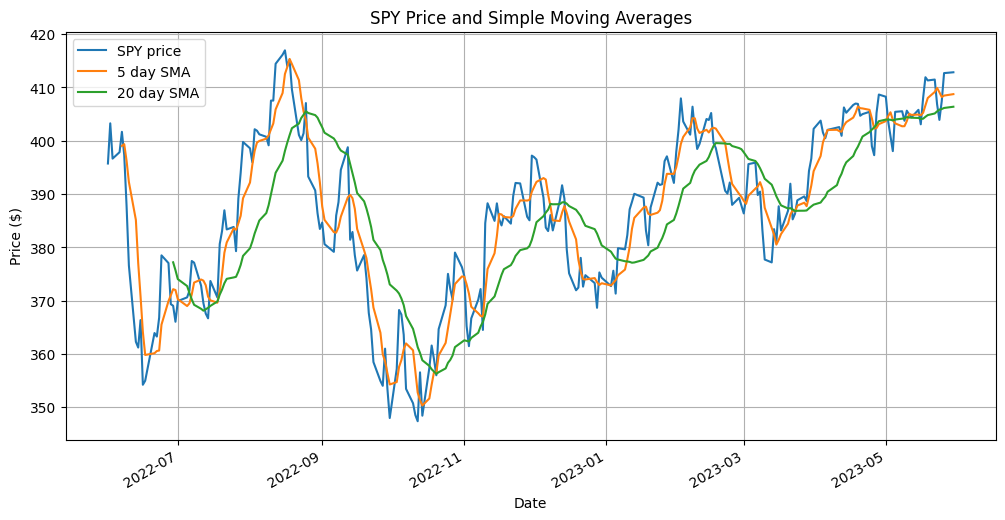

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(prices, label=f'{TICKER} price')
prices.rolling(SHORT_WINDOW).mean().plot(label='5 day SMA')
prices.rolling(LONG_WINDOW).mean().plot(label='20 day SMA')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title(f'{TICKER} Price and Simple Moving Averages')
plt.legend()
plt.grid()
plt.show()

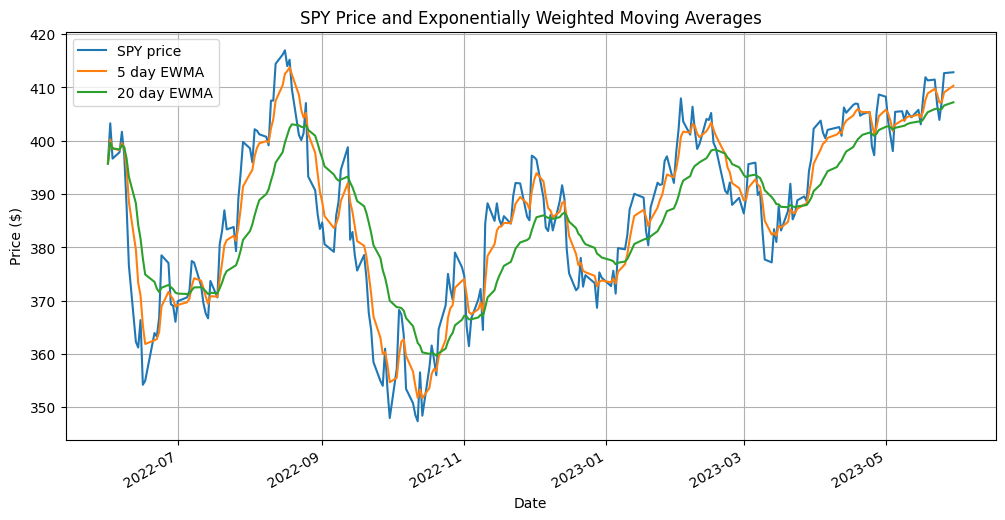

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(prices, label=f'{TICKER} price')
prices.ewm(span=SHORT_WINDOW).mean().plot(label='5 day EWMA')
prices.ewm(span=LONG_WINDOW).mean().plot(label='20 day EWMA')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title(f'{TICKER} Price and Exponentially Weighted Moving Averages')
plt.legend()
plt.grid()
plt.show()

In [5]:
df = pd.DataFrame(prices)
risk_free_rate = get_risk_free_rate(START_DATE, END_DATE)
ewmac = EWMAC(df, short_window=SHORT_WINDOW, long_window=LONG_WINDOW)
backtest_trader = BacktestTrader(ewmac, df)

backtest_trader.run_backtest()
results = backtest_trader.get_results(risk_free_rate)

c:\Users\Yang\Documents\Projects\funance_blog\src\backtest\backtest_trader.py:88: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  self.portfolio_value = pd.concat([self.portfolio_value, value])


In [6]:
results

{'portfolio_value': 10591.45263671875,
 'total_returns': 0.059145263671875,
 'average_returns': 0.00023079862917674276,
 'annual_returns': 0.0598787807654253,
 'annual_std': 0.14082899544002783,
 'sharpe_ratio': 0.1774065114290748}

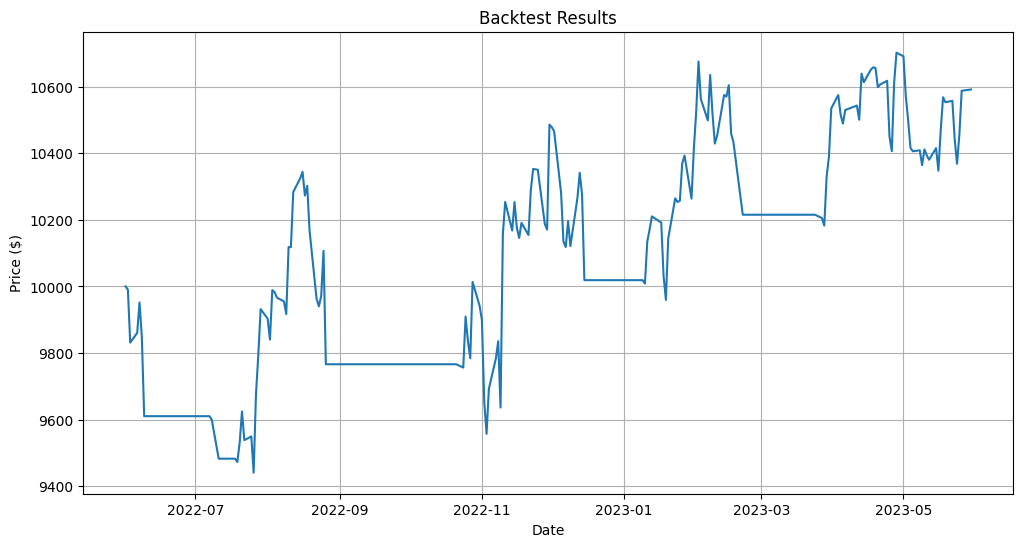

In [7]:
backtest_trader.plot_results()

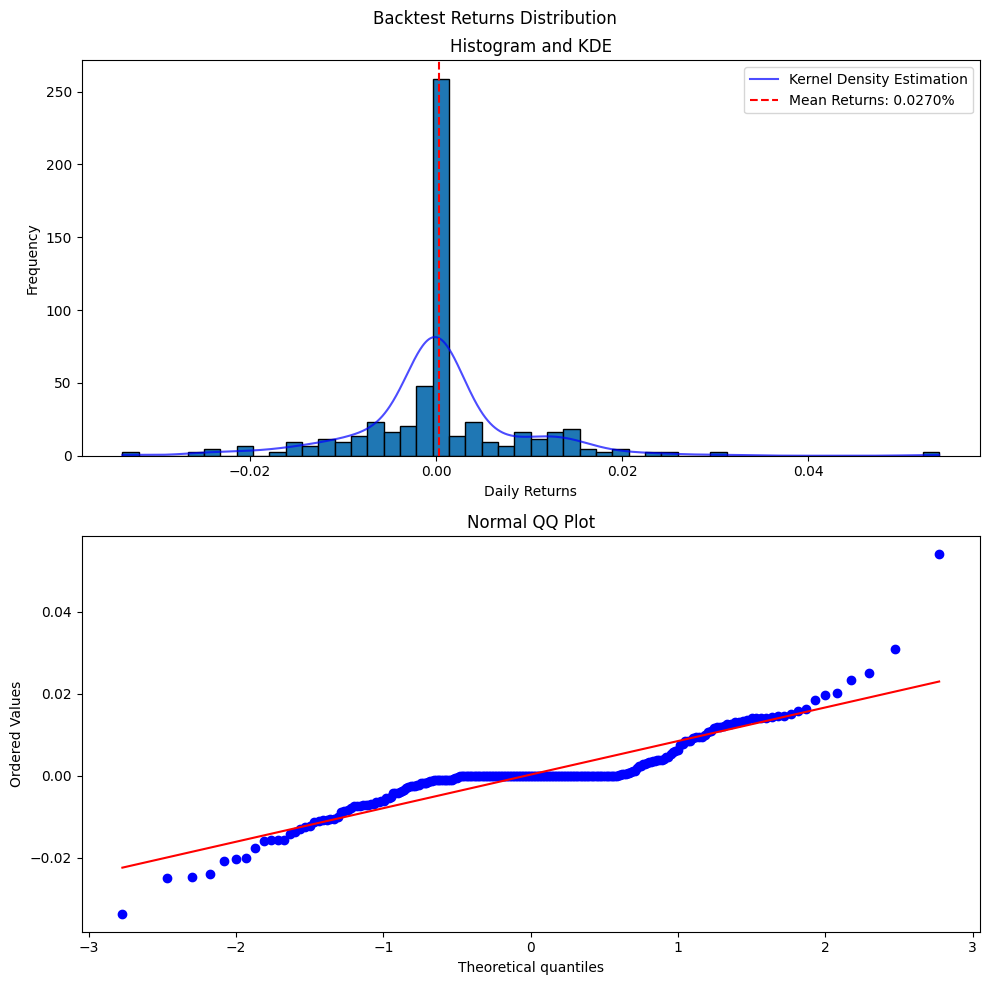

In [8]:
backtest_trader.plot_analysis()

In [9]:
df = pd.DataFrame(prices)
risk_free_rate = get_risk_free_rate(START_DATE, END_DATE)
ewmac = EWMAC(df, short_window=SHORT_WINDOW, long_window=LONG_WINDOW, enable_shorting=True)
backtest_trader = BacktestTrader(ewmac, df)

backtest_trader.run_backtest()
results = backtest_trader.get_results(risk_free_rate)

c:\Users\Yang\Documents\Projects\funance_blog\src\backtest\backtest_trader.py:88: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  self.portfolio_value = pd.concat([self.portfolio_value, value])


In [10]:
results

{'portfolio_value': 10873.619544355624,
 'total_returns': 0.08736195443556244,
 'average_returns': 0.0003364201808908618,
 'annual_returns': 0.08845975519131599,
 'annual_std': 0.19671035710011098,
 'sharpe_ratio': 0.27230368550297795}

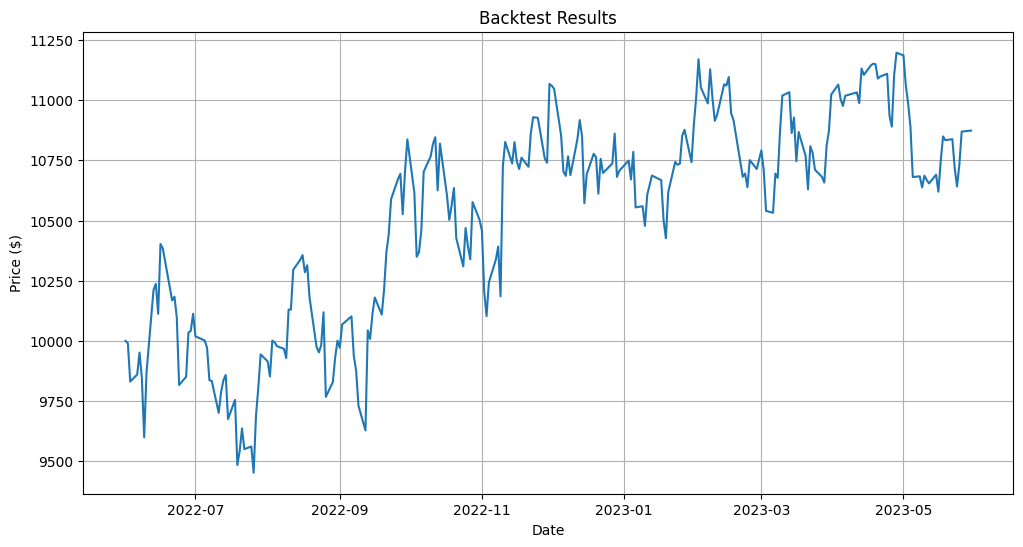

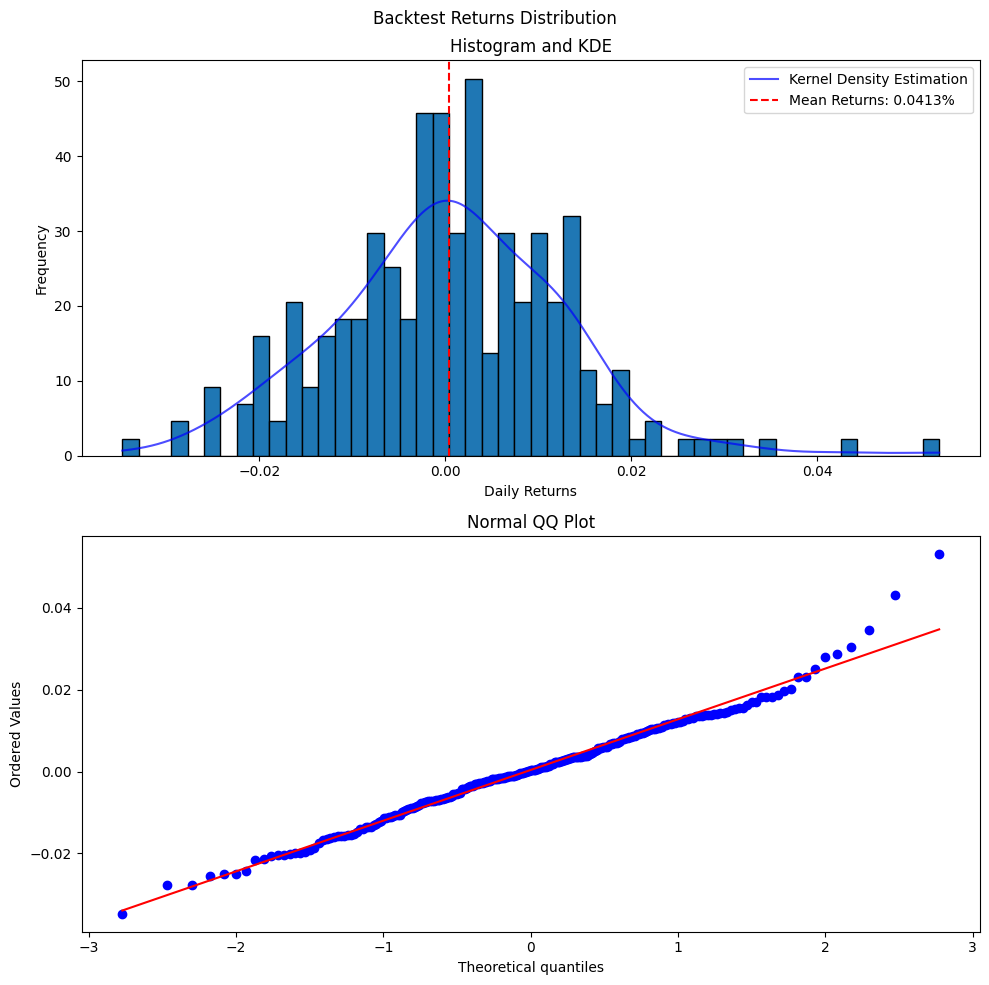

In [11]:
backtest_trader.plot_results()
backtest_trader.plot_analysis(hist_bins=50)